In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score ,mean_absolute_error ,mean_squared_error,r2_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

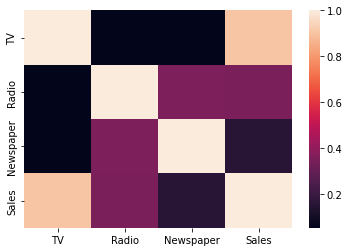

In [4]:
sns.heatmap(df.corr(),data=df)

In [5]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


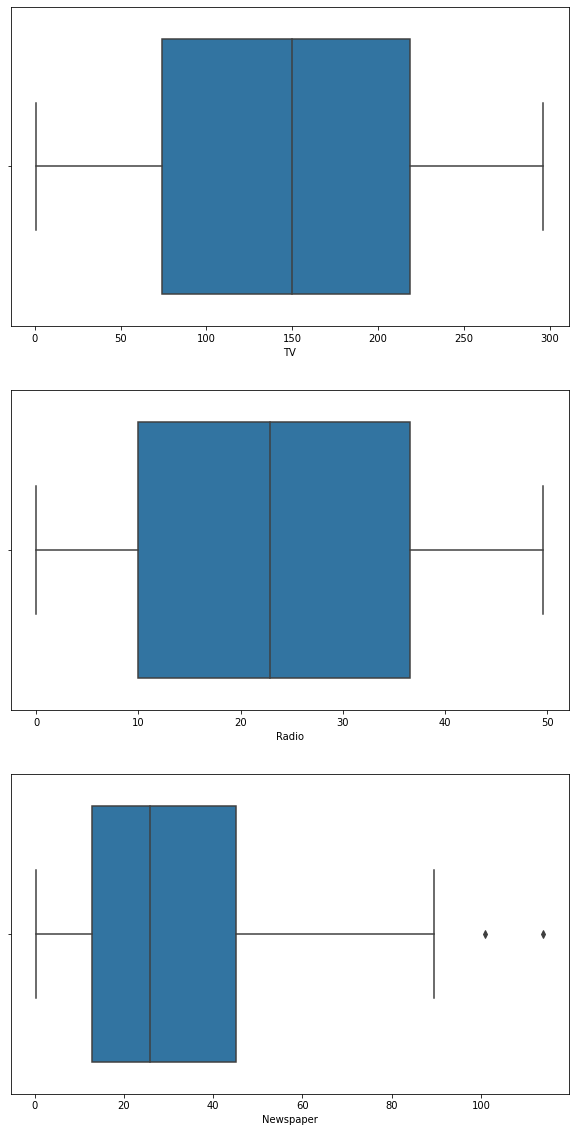

In [6]:
fig, axes = plt.subplots(3,1,figsize=(10,20))
count=0
for i in df.columns[:-1]:
    sns.boxplot(ax=axes[count],data=df,x=i)
    count+=1

In [7]:
for i in df.columns:
    if i=='Sales':
        continue
    q3=np.quantile(df[i], 0.75)
    q1=np.quantile(df[i], 0.25)
    iqr=1.5*(q3-q1)
    b0=q1-iqr
    b1=q3+iqr
    df=df[(b0<df[i]) & (df[i]<b1)]

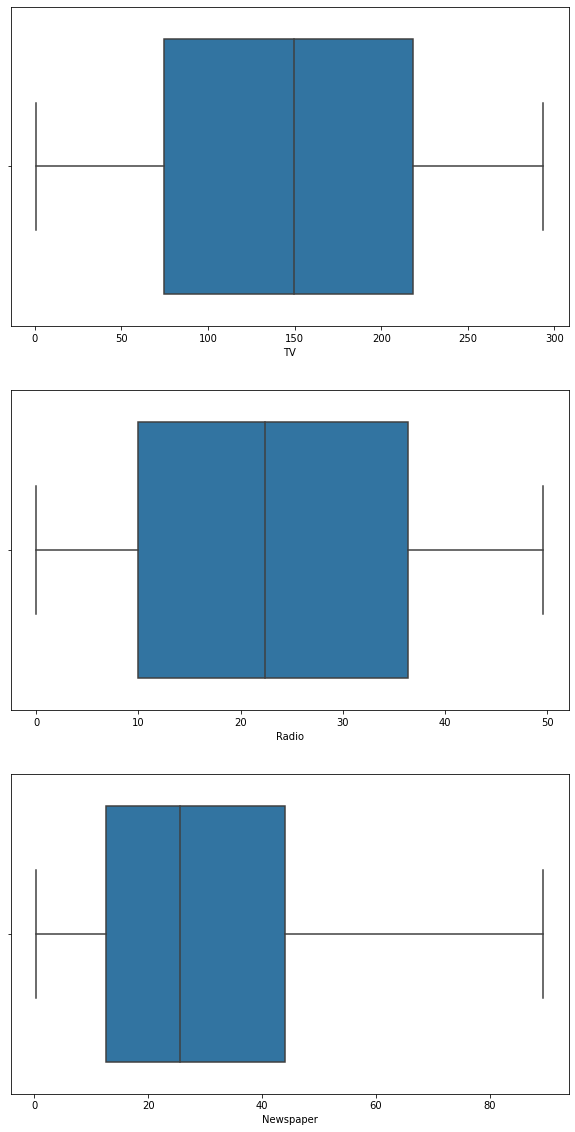

In [8]:
fig, axes = plt.subplots(3,1,figsize=(10,20))
count=0
for i in df.columns[:-1]:
    sns.boxplot(ax=axes[count],data=df,x=i)
    count+=1

In [9]:
df.index.size

198

# Model building

In [10]:
x = df.drop(['Sales'],axis=1).values
x
#x = df[["tv","radio","newspaper"]].values

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [265.6,  20. ,   0.3],
       [ 9

In [11]:
y = df["Sales"].values
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 24.4, 11.3, 14.6, 18. , 17.5,  5.6,
       20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2, 17.4,
       11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,  8.5,
       16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7,
        5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3, 11. ,
       13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9, 14.2,
        5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. , 12.9,
       16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4, 17.2,
       16.7, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8, 18.4, 21.8,
       17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,  7. , 16.6,
       15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,  5.7, 19.6,
       10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1, 10.4, 12.3,
       10.3, 18.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
y_test

array([11. , 12.2, 24.4, 10.4,  7.3, 24.7, 20.1, 11.9, 14.6, 20. , 16.4,
       22.4,  5.5, 13.2,  9.4, 10.6,  6.6, 15.6, 10.1, 12. , 12.6, 18. ,
       24.2,  6.7, 17. , 22.3,  7. , 16.9,  6.6, 16.7, 18.3, 14.2, 11.9,
       13.6, 17. , 19.6, 20.5, 16.7, 18. , 16.6])

In [14]:
model = LinearRegression()

In [15]:
model

LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([ 8.82481623, 13.77055468, 24.22481723, 11.10056512,  9.32009201,
       21.48456053, 20.15850056, 12.76167515, 15.12881886, 21.08287367,
       15.98934888, 20.38088326,  8.16535464, 14.03642672,  8.9375406 ,
       10.73054602,  9.35201578, 15.82574293,  9.79573284, 11.63821168,
       12.60519985, 17.21866213, 23.44516693,  7.02979947, 18.7214195 ,
       20.9597909 ,  8.20661353, 18.25399281,  7.45331361, 14.85839901,
       18.74710884, 14.11078068,  9.01994517, 13.07559033, 19.30878714,
       17.89362267, 16.88640389, 14.52324791, 19.60537819, 17.74576003])

In [19]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_res

,Actual,Predicted
0,11.0,8.824816
1,12.2,13.770555
2,24.4,24.224817
3,10.4,11.100565
4,7.3,9.320092
5,24.7,21.484561
6,20.1,20.158501
7,11.9,12.761675
8,14.6,15.128819
9,20.0,21.082874


# Evaluation

In [20]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1.2310754565160391
Mean Squared Error: 2.4157289455935063
Root Mean Squared Error: 1.5542615434969451


In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


In [22]:
df["Sales"].mean()*0.10

1.5100000000000002

In [23]:
df["Sales"].mean()*0.103>np.sqrt(mean_squared_error(y_test,y_pred))

True

# Implementation

In [24]:
0.103
10,3

(10, 3)

In [25]:
df.index.size

198